In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
import pandas as pd
import string
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

from gensim.models import *
import gensim.downloader

import tensorflow as tf
from tensorflow.keras.utils import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
tf.random.set_seed(42)

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/DLNLP/TrainData.csv")
df_train['Category'] = df_train['Category'].map({'business':0,'entertainment':1,'politics':2,'sport':3,'tech':4})
df_train.columns = ['text','class']

df_train['text'] = df_train.text.str.lower().str.replace(r'['+string.digits+string.punctuation+']', ' ')
df_train['text'] = df_train['text'].apply(lambda x: x.split())

df_train.shape

(1490, 2)

['minimum', 'wage', 'increased', 'to', '£', 'the', 'minimum', 'wage', 'will', 'rise', 'in', 'october', 'benefiting', 'more', 'than', 'm', 'people', 'the', 'government', 'has', 'announced', 'adults', 'must', 'be', 'paid', 'at', 'least', '£', 'an', 'hour', 'up', 'from', '£', 'while', 'to', 'year', 'olds', 'will', 'be', 'paid', '£', 'the', 'recommendations', 'came', 'from', 'the', 'low', 'pay', 'commission', 'which', 'said', 'the', 'number', 'of', 'jobs', 'had', 'continued', 'to', 'grow', 'since', 'the', 'minimum', 'wage', 'was', 'introduced', 'in', 'businesses', 'wanted', 'it', 'frozen', 'warning', 'more', 'rises', 'could', 'damage', 'competitiveness', 'but', 'the', 'unions', 'want', 'a', '£', 'rate', 'a', 'further', 'increase', 'in', 'the', 'adult', 'rate', 'to', '£', 'an', 'hour', 'is', 'provisionally', 'scheduled', 'for', 'october', 'according', 'to', 'the', 'commission', 'many', 'businesses', 'had', 'found', 'the', 'last', 'two', 'significant', 'increases', 'in', 'the', 'minimum', 'w

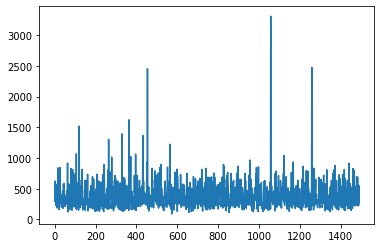

In [ ]:
import scipy
max = 0
txt = ''
row_len = []
for i in range(df_train.shape[0]):
  row_len.append(len(df_train.iloc[i]['text']))
  if (len(df_train.iloc[i]['text']) >max):
    max = len(df_train.iloc[i]['text'])
    txt = df_train.iloc[i]['text']
    
              
print(txt,max)
print(scipy.stats.mode(row_len))
print(np.mean(row_len))
plt.plot(row_len)


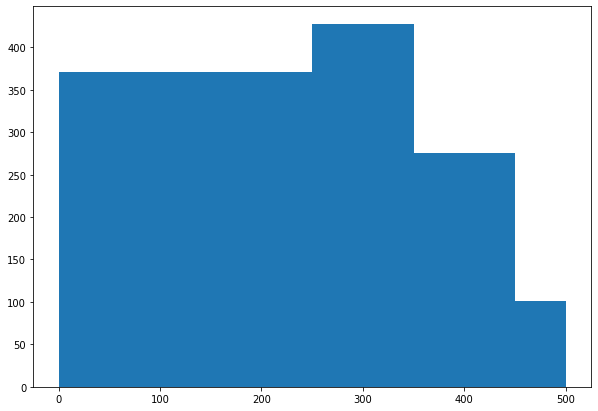

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(row_len, bins = [0, 250,350,450, 500])
 
# Show plot
plt.show()

In [ ]:
gv = gensim.downloader.load('glove-wiki-gigaword-300')
w2v = gensim.downloader.load('word2vec-google-news-300') 
ft = gensim.downloader.load('fasttext-wiki-news-subwords-300') 

[==================================================] 100.0% 376.1/376.1MB downloaded
[==================================================] 100.0% 1662.8/1662.8MB downloaded
[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
es = 300

str_len = 500
tz = Tokenizer(lower=True)
tz.fit_on_texts(df_train['text'])
X_train = tz.texts_to_sequences(df_train['text'])
X_train = pad_sequences(X_train, maxlen=str_len)
X_train = np.asarray(X_train)
print(X_train.shape)

NameError: ignored

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/DLNLP/TestData.csv",encoding='ISO 8859-1')
df_test['Class'] = df_test['Class'].map({'business':0,'entertainment':1,'politics':2,'sport':3,'tech':4})
df_test = df_test[['Text','Class']]
df_test.columns = ['text','class']


df_test['text'] = df_test.text.str.lower().str.replace(r'['+string.digits+string.punctuation+']', ' ')
df_test['text'] = df_test['text'].apply(lambda x: x.split())

print(df_test.shape)

X_test = tz.texts_to_sequences(df_test['text'])
X_test = pad_sequences(X_test, maxlen=str_len)
X_test = np.asarray(X_test)
print(X_test.shape)

(735, 2)
(735, 500)


In [ ]:
       
gv_embedding = np.random.random((len(tz.word_index) + 1, es))
w2v_embedding = np.random.random((len(tz.word_index) + 1, es))
ft_embedding = np.random.random((len(tz.word_index) + 1, es))

for word,i in tz.word_index.items():
    try:
      gv_embedding[i] = gv.wv[word]
    except:
      gv_embedding[i] = np.zeros((es,))
    try:
      w2v_embedding[i] = w2v.wv[word]
    except:
      w2v_embedding[i] = np.zeros((es,))
    try:
      ft_embedding[i] = ft.wv[word]
    except:
      ft_embedding[i] = np.zeros((es,))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()


In [ ]:
def ProjEmbLayer(embeddings, str_len):
    
    inputs = []
    output = []
    inp = Input(shape=(str_len,))
    for embedding in embeddings:  
        emb = Embedding(len(tz.word_index) + 1, es, weights=[embedding], trainable=False)(inp)
        emb = Reshape((-1,es,1))(emb)
        proj = projection(str_len)
        x = proj(Reshape((-1,es))(emb))
        output.append(Reshape((-1,es,1))(x))    
    return Model(inp, Concatenate(axis=-1)(output))


In [ ]:
def EmbLayer(embeddings, str_len):
    
    inputs = []
    output = []
    inp = Input(shape=(str_len,))
    for embedding in embeddings:  
        
        emb = Embedding(len(tz.word_index) + 1, es, weights=[embedding], trainable=False)(inp)
        emb = Reshape((-1,es,1))(emb)
        
        output.append(emb)    
    return Model(inp, Concatenate(axis=-1)(output))


In [ ]:

def projection(str_len):

    inp = Input(shape=(str_len, es))
    out = Dense(es,activation=None)(inp)

    return Model(inp, out)

def myDynamicMetaEmbedding(str_len):
    inp = Input(shape=(str_len, es, n))
    proj2mul  = Reshape((str_len, es,n))(inp)    ## (None, 30, 300, 3)
    proj = Permute((1,3, 2)) (proj2mul)          ## (None, 30, 3, 300)
    alphas = Dense(1,activation=None)(proj)      ## (None, 30, 3, 1)
    alphas = Activation('softmax')(alphas)       ## (None, 30, 3, 1)
    alphas2mul = Permute((1,3, 2)) (alphas)      ## (None, 30, 1, 3)
    x = multiply([proj2mul, alphas2mul])         ## (None, 30, 300, 3)
    out = Lambda(lambda t: K.sum(t, axis=-1))(x) ## (None, 30, 300)
    print('Out',out.shape)                      

    return Model(inp, out)

### WRONG ###

    # proj = Reshape((maxlen, es,n))(temp)
    # alphas = Dense(n,activation=None)(temp)
    # alphas = Activation('softmax')(alphas)
    # alphas = Reshape((maxlen,1,n))(alphas)
    # x = multiply([proj,alphas])
    # out = Lambda(lambda t: K.sum(t, axis=-1))(x)

    
    

In [ ]:
n=3
embLayer = ProjEmbLayer([w2v_embedding,gv_embedding, ft_embedding], str_len)
dme = myDynamicMetaEmbedding(str_len)
x = dme(embLayer.output)
x = LSTM(64)(x)
out = Dense(5, activation='softmax')(x)

model1 = Model(embLayer.input, out)
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model1.fit(X_train, df_train['class'], batch_size=64, epochs=10, verbose=1, validation_split=0.1,callbacks=[callback])



In [ ]:
from sklearn.metrics import f1_score
print("TEST SET",f1_score(df_test['class'],np.argmax(model1.predict(X_test), axis=-1),average='micro'))

In [ ]:
n=3
embLayer = ProjEmbLayer([w2v_embedding,gv_embedding, ft_embedding], str_len)
dme = myDynamicMetaEmbedding(str_len)
x = dme(embLayer.output)
print(x.shape)
x = Bidirectional(LSTM(64,return_sequences=True))(x)
print(x.shape)
x = MultiHeadAttention(num_heads=1, key_dim=128) (x,x,x)
print(x.shape)
x = Flatten()(x)
print(x.shape)
out = Dense(5, activation='softmax')(x)

model = Model(embLayer.input, out)
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, df_train['class'], batch_size=64, epochs=10, verbose=1, validation_split=0.1,callbacks=[callback])



In [ ]:
from sklearn.metrics import f1_score
print("TEST SET",f1_score(df_test['class'],np.argmax(model.predict(X_test), axis=-1),average='micro'))

In [ ]:
n=3
embLayer = ProjEmbLayer([w2v_embedding,gv_embedding, ft_embedding], str_len)
dme = myDynamicMetaEmbedding(str_len)
x = dme(embLayer.output)

x = Conv1D(32, 3, padding='same', activation='relu')(x)
x = MaxPooling1D()(x)
x = Flatten()(x)
x = Dense(250, activation='relu')(x)

out = Dense(5, activation='softmax')(x)

model2 = Model(embLayer.input, out)
model2.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model2.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model2.fit(X_train, df_train['class'], batch_size=64, epochs=10, verbose=1, validation_split=0.1,callbacks=[callback])



In [ ]:
from sklearn.metrics import f1_score
print("TEST SET",f1_score(df_test['class'],np.argmax(model2.predict(X_test), axis=-1),average='micro'))

In [ ]:
n=3
embLayer = ProjEmbLayer([w2v_embedding,gv_embedding, ft_embedding], str_len)
dme = myDynamicMetaEmbedding(str_len)
x = dme(embLayer.output)

x = Conv1D(64, 3, padding='same', activation='relu')(x)
x = MaxPooling1D()(x)


print(x.shape)
x = LSTM(64,return_sequences=True)(x)
print(x.shape)
attention = Dense(1, activation="tanh")(x)
print(attention.shape)
attention = Flatten()(attention)
print(attention.shape)
attention = Activation("softmax")(attention)
print(attention.shape)
attention = RepeatVector(64 )(attention)
print(attention.shape)
attention = Permute([2,1])(attention)
print(attention.shape)
x = Multiply()([x, attention])
print(x.shape)
x = Lambda(lambda xin: K.sum(xin, axis=-2),
                            output_shape=(64,))(x)


print(x.shape)
out = Dense(5, activation='softmax')(x)

model3 = Model(embLayer.input, out)
model3.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model3.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model3.fit(X_train, df_train['class'], batch_size=64, epochs=100, verbose=1, validation_split=0.1,callbacks=[callback])



Out (None, 500, 300)
(None, 250, 64)
(None, 250, 64)
(None, 250, 1)
(None, 250)
(None, 250)
(None, 64, 250)
(None, 250, 64)
(None, 250, 64)
(None, 64)
Model: "model_113"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_91 (InputLayer)           [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding_54 (Embedding)        (None, 500, 300)     7067100     input_91[0][0]                   
__________________________________________________________________________________________________
embedding_55 (Embedding)        (None, 500, 300)     7067100     input_91[0][0]                   
__________________________________________________________________________________________________
embedding_56 (Embedding)        (None,

In [ ]:
from sklearn.metrics import f1_score
print("TEST SET",f1_score(df_test['class'],np.argmax(model3.predict(X_test), axis=-1),average='micro'))

TEST SET 0.9619047619047619


In [ ]:


n=3
embLayer = ProjEmbLayer([w2v_embedding,gv_embedding, ft_embedding], str_len)
dme = myDynamicMetaEmbedding(str_len)
x = dme(embLayer.output)

x = Conv1D(64, 3, padding='same', activation='relu')(x)
x = MaxPooling1D()(x)


print(x.shape)
x = LSTM(64)(x)
print(x.shape)

out = Dense(5, activation='softmax')(x)

model4 = Model(embLayer.input, out)
model4.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model4.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model4.fit(X_train, df_train['class'], batch_size=64, epochs=100, verbose=1, validation_split=0.1,callbacks=[callback])



Out (None, 500, 300)
(None, 250, 64)
(None, 64)
Model: "model_119"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_96 (InputLayer)           [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding_57 (Embedding)        (None, 500, 300)     7067100     input_96[0][0]                   
__________________________________________________________________________________________________
embedding_58 (Embedding)        (None, 500, 300)     7067100     input_96[0][0]                   
__________________________________________________________________________________________________
embedding_59 (Embedding)        (None, 500, 300)     7067100     input_96[0][0]                   
__________________________________________

In [ ]:
from sklearn.metrics import f1_score
print("TEST SET",f1_score(df_test['class'],np.argmax(model4.predict(X_test), axis=-1),average='micro'))

TEST SET 0.9564625850340136


In [ ]:
n=1
embLayer = EmbLayer([w2v_embedding], str_len)
x = Reshape((str_len,es))(embLayer.output)
print(x.shape)
x = LSTM(128, dropout=0.2,return_sequences=True)(x)
x = LSTM(32)(x)
out = Dense(5, activation='softmax')(x)

w2v_model = Model(embLayer.input, out)
w2v_model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

w2v_model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
histor = w2v_model.fit(X_train, df_train['class'], batch_size=64, epochs=10, verbose=1, validation_split=0.1,callbacks=[callback])
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

print("TEST SET",w2v_model.evaluate(X_test, df_test['class']))

In [ ]:
n=1
embLayer = EmbLayer([gv_embedding], str_len)
x = Reshape((str_len,es))(embLayer.output)
print(x.shape)
x = LSTM(128, dropout=0.2,return_sequences=True)(x)
x = LSTM(32)(x)
out = Dense(2, activation='sigmoid')(x)

gv_model = Model(embLayer.input, out)
gv_model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

gv_model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = gv_model.fit(X_train, df_train['class'], batch_size=64, epochs=10, verbose=1, validation_split=0.1,callbacks=[callback])

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

print("TEST SET",gv_model.evaluate(X_test, df_test['class']))


In [ ]:
n=3
embLayer = ProjEmbLayer([w2v_embedding,gv_embedding, ft_embedding], str_len)
dme = myDynamicMetaEmbedding(str_len)
x = dme(embLayer.output)

x = Conv1D(64, 3, padding='same', activation='relu')(x)
x = MaxPooling1D()(x)

# x = LSTM(64)(x)
# out = Dense(5, activation='softmax')(x)

print(x.shape)
x = LSTM(64,return_sequences=True)(x)
print(x.shape)
attention = Dense(1, activation="tanh")(x)
print(attention.shape)
attention = Flatten()(attention)
print(attention.shape)
attention = Activation("softmax")(attention)
print(attention.shape)
# attention = RepeatVector(64 )(attention)
# print(attention.shape)
attention = Permute([2,1])(attention)
print(attention.shape)
x = Multiply()([x, attention])
print(x.shape)
x = Lambda(lambda xin: K.sum(xin, axis=-2),
                            output_shape=(64,))(x)


print(x.shape)
out = Dense(5, activation='softmax')(x)

model3 = Model(embLayer.input, out)
model3.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model3.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model3.fit(X_train, df_train['class'], batch_size=64, epochs=10, verbose=1, validation_split=0.1,callbacks=[callback])



Out (None, 500, 300)
(None, 250, 64)
(None, 250, 64)
(None, 250, 1)
(None, 250)
(None, 250)


ValueError: ignored